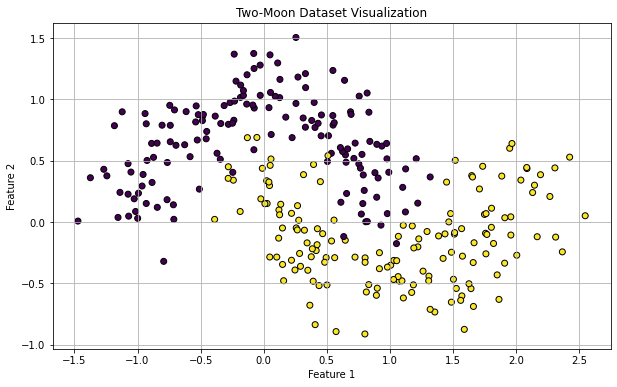

In [56]:
#1
#Part 1: GMM as a density estimator

import numpy as np
from sklearn.datasets import make_moons
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Download two-moon dataset
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k') #Initial index error, resolved
plt.title('Two-Moon Dataset Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()



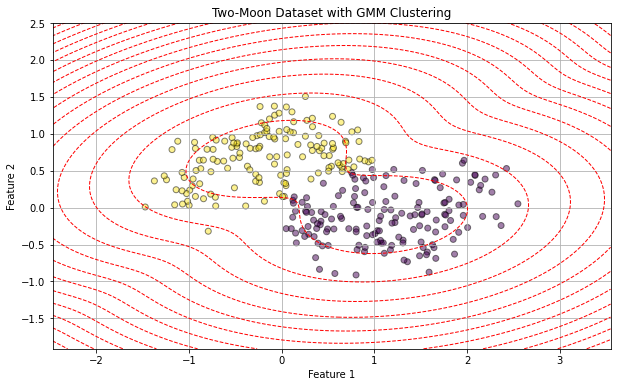

In [57]:
#2
#Two-component Gaussian Mixture Model


gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X)

# Predict labels
labels = gmm.predict(X)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', alpha=0.5)
plt.title('Two-Moon Dataset with GMM Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)

# Generate points to sample
x = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 1000)
y = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1, 1000)
Xgrid, Ygrid = np.meshgrid(x, y)
Xgrid_flat = np.column_stack([Xgrid.ravel(), Ygrid.ravel()])

# Evaluate
densities = gmm.score_samples(Xgrid_flat).reshape(Xgrid.shape)

# Plot level sets
plt.contour(Xgrid, Ygrid, densities, levels=15, linewidths=1, colors='r')

plt.show()


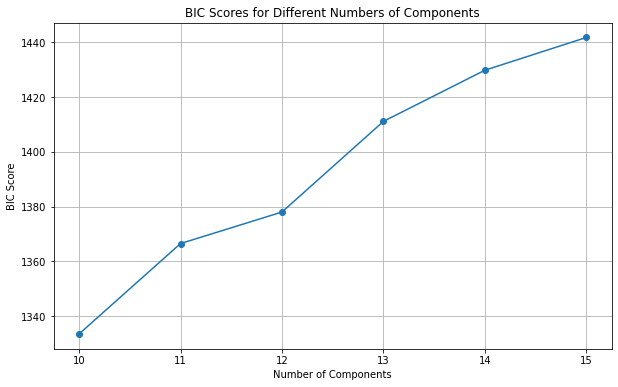

In [58]:
#3
#BIC 


# Set up a range for the number of components to test
n_components_range = range(10, 16)

# Store BIC scores for each number of components
bic_scores = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X)
    bic_scores.append(gmm.bic(X))

# Plot BIC scores
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, bic_scores, marker='o')
plt.title('BIC Scores for Different Numbers of Components')
plt.xlabel('Number of Components')
plt.ylabel('BIC Score')
plt.grid(True)

plt.show()



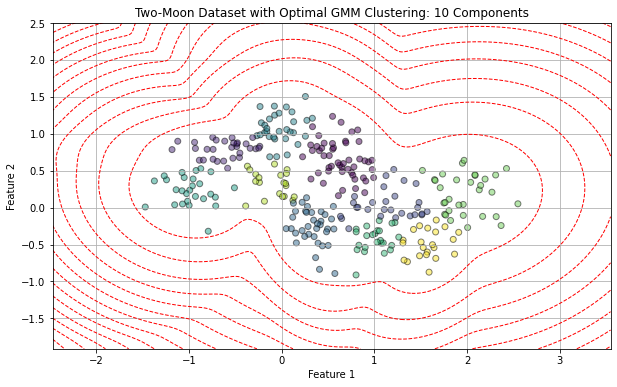

In [59]:
#4
#Optimal GMM Clustering

# Find optimal number of components
optimal_components = n_components_range[np.argmin(bic_scores)]
optimal_gmm = GaussianMixture(n_components=optimal_components, random_state=42)
optimal_gmm.fit(X)

# Predict the optimal GMM labels
optimal_labels = optimal_gmm.predict(X)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=optimal_labels, cmap='viridis', edgecolors='k', alpha=0.5)
plt.title(f'Two-Moon Dataset with Optimal GMM Clustering: {optimal_components} Components')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)

# Evaluate optimal density
densities_optimal = optimal_gmm.score_samples(Xgrid_flat).reshape(Xgrid.shape)

# Plot level sets
plt.contour(Xgrid, Ygrid, densities_optimal, levels=15, linewidths=1, colors='r')

plt.show()


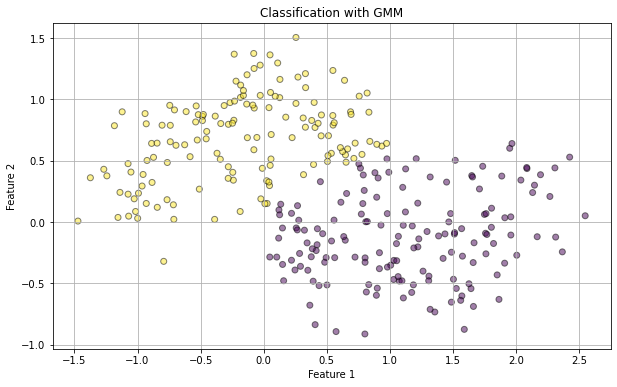

In [60]:
#5
#GMMas a classifier

# Label data based on location
labels = np.array([1 if point[1] > -0.25 else -1 for point in X])

# Two-component GMM for classification
classifier_gmm = GaussianMixture(n_components=2, random_state=42)
classifier_gmm.fit(X, labels)

# Probability per class
probabilities = classifier_gmm.predict_proba(X)

# Match point and class
predicted_labels = np.argmax(probabilities, axis=1)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=predicted_labels, cmap='viridis', edgecolors='k', alpha=0.5)
plt.title('Classification with GMM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)


plt.show()


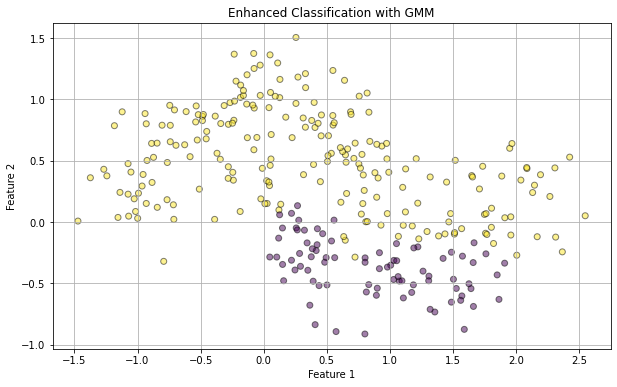

In [61]:
#6
#GMM as a classifier with 10 components 

# Increase components
enhanced_classifier_gmm = GaussianMixture(n_components=10, random_state=42)
enhanced_classifier_gmm.fit(X, labels)

# Probs. per class for the enhanced model
enhanced_probabilities = enhanced_classifier_gmm.predict_proba(X)

# Define a metric
component_class_assignment = []
for i in range(enhanced_classifier_gmm.n_components):
    component_mask = enhanced_probabilities[:, i] > 0.5
    # Determine the class
    if np.sum(labels[component_mask] == 1) > np.sum(labels[component_mask] == -1):
        component_class_assignment.append(1)
    else:
        component_class_assignment.append(-1)

#Match
enhanced_predicted_labels = [component_class_assignment[np.argmax(row)] for row in enhanced_probabilities]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=enhanced_predicted_labels, cmap='viridis', edgecolors='k', alpha=0.5)
plt.title('Enhanced Classification with GMM')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)

plt.show()



In [62]:
#7
#Evaluate 10-componenet performace 


from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

# Convert labels for compatibility with skl
true_labels = (labels + 1) // 2
predicted_labels_binary = (np.array(enhanced_predicted_labels) + 1) // 2

# Calculate F1 score and classification report
f1 = f1_score(true_labels, predicted_labels_binary)
report = classification_report(true_labels, predicted_labels_binary)

# Output the F1 score and classification report
print("F1 Score:", f1)
print("Classification Report:\n", report)

# Decision based on 
if f1 < 0.95:  #At a 95% performance threshold 
    print("Increase the number of components to improve accuracy.")
else:
    print("The current model performs satisfactorily with an F1 score above 0.95.")


F1 Score: 0.9429824561403509
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.95      0.82        62
           1       0.99      0.90      0.94       238

    accuracy                           0.91       300
   macro avg       0.85      0.93      0.88       300
weighted avg       0.93      0.91      0.92       300

Increase the number of components to improve accuracy.


Final F1 Score: 0.9480519480519479
Final Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.92      0.83        62
           1       0.98      0.92      0.95       238

    accuracy                           0.92       300
   macro avg       0.86      0.92      0.89       300
weighted avg       0.93      0.92      0.92       300



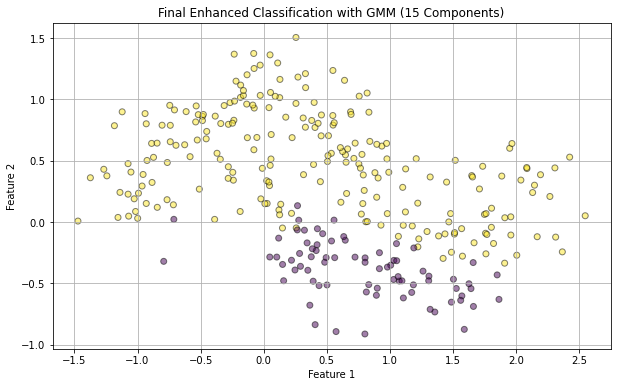

In [63]:
#8
#Increase number of components based on previous f1  score

# components = 15
final_classifier_gmm = GaussianMixture(n_components=15, random_state=42)
final_classifier_gmm.fit(X, labels)

# Predict probs.
final_probabilities = final_classifier_gmm.predict_proba(X)

# Re-assign each component to a class
final_component_class_assignment = []
for i in range(final_classifier_gmm.n_components):
    component_mask = final_probabilities[:, i] > 0.5
    # Determine class
    if np.sum(labels[component_mask] == 1) > np.sum(labels[component_mask] == -1):
        final_component_class_assignment.append(1)
    else:
        final_component_class_assignment.append(-1)

# Assign label
final_predicted_labels = [final_component_class_assignment[np.argmax(row)] for row in final_probabilities]

# Convert final predicted labels
final_predicted_labels_binary = (np.array(final_predicted_labels) + 1) // 2

# Calculate F1 and report 
final_f1 = f1_score(true_labels, final_predicted_labels_binary)
final_report = classification_report(true_labels, final_predicted_labels_binary)

# Output
print("Final F1 Score:", final_f1)
print("Final Classification Report:\n", final_report)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=final_predicted_labels, cmap='viridis', edgecolors='k', alpha=0.5)
plt.title('Final Enhanced Classification with GMM (15 Components)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)


plt.show()


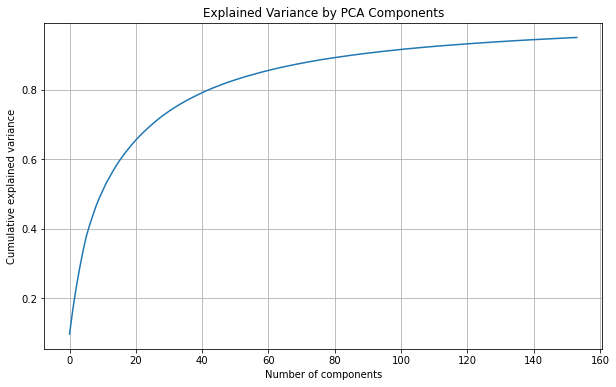

In [64]:
#9
#GMM as a generative model

#PCA

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load MNIST data
mnist = fetch_openml('mnist_784')

# Convert to numpy and normalize
X_mnist = mnist.data.astype('float32') / 255.0
y_mnist = mnist.target.astype('int')

# Apply PCA to obtain 95% of variance
pca = PCA(n_components=0.95)
X_mnist_pca = pca.fit_transform(X_mnist)

# Plot the explained variance by PCA components
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

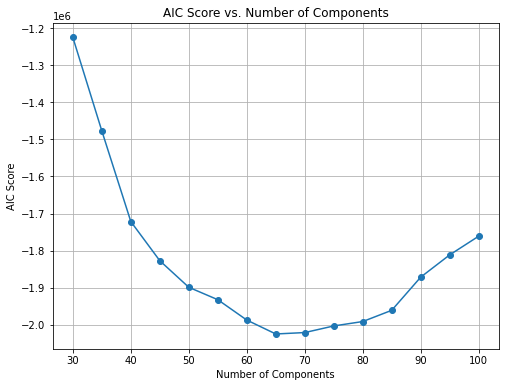

Optimal number of components based on AIC: 65


In [65]:
#10
#AIC


# Subset
subset_size = 3000
if X_mnist_pca.shape[0] > subset_size:
    X_sample = X_mnist_pca[np.random.choice(X_mnist_pca.shape[0], size=subset_size, replace=False), :]
else:
    X_sample = X_mnist_pca

# Determine 0ptimal # of componenets with AIC
n_components_range = range(30, 101, 5) #try 5 by 5 to save processing time
aic_scores = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    gmm.fit(X_sample)
    aic_scores.append(gmm.aic(X_sample))

# Plot AIC values
plt.figure(figsize=(8, 6))
plt.plot(n_components_range, aic_scores, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('AIC Score')
plt.title('AIC Score vs. Number of Components')
plt.grid(True)
plt.show()

#Decision
optimal_component = n_components_range[np.argmin(aic_scores)]
print(f"Optimal number of components based on AIC: {optimal_component}")



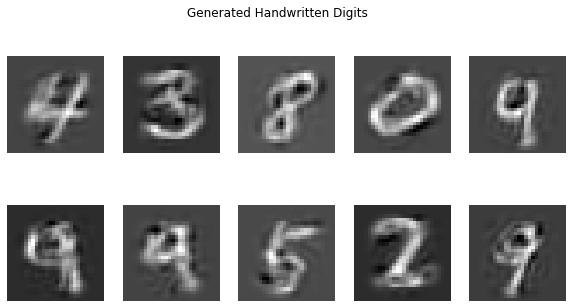

In [66]:
#11
#Generate new samples

import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Split into training and test sets
X_train, X_test = train_test_split(X_mnist_pca, test_size=0.2, random_state=42)

# Train GMM
gmm_density = GaussianMixture(n_components=optimal_component, random_state=42)  # components determined by AIC
gmm_density.fit(X_train)

# Generate new samples
new_samples = gmm_density.sample(20)[0]

# Back to original spac
new_samples_inverse = pca.inverse_transform(new_samples) #GPT help

# Plot samples
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(new_samples_inverse[i].reshape(28, 28), cmap='gray')  # Reshapedto 28x28 for MNIST images
    plt.axis('off')
plt.suptitle('Generated Handwritten Digits')
plt.show()
